# Exercise 15-1: More analysis of the Curry data

## Get the data

Importing neccessary libraries, which are **pandas**, **season**, and **json**.

In [1]:
import pandas as pd
import seaborn as sns
import json 

- `with` and `open()` work together to open `shots.json` file in reading mode and close it after it finishes reading without using the `close()` as `jsonData`. 
- `load()` reads `jsonData`, then convert the data from Json to Python and store it in `shots`.
- `lower()` makes the texts in the value `headers` of the key `resultSets` lower case using a *for loop*, then assigning them to `columnHeaders`.
- Assigning the value `rowSet` of the key `resultSets` to `rows`.
- `pd.DataFrame` creates a new data frame  with `rows` as the data points and `columnHeaders` as columns of it.
- Updating the `shots` variable by reassigning the new data frame to it.

In [2]:
with open('shots.json') as jsonData: 
    shots = json.load(jsonData)
columnHeaders = [x.lower() for x in shots['resultSets'][0]['headers']]
rows = shots['resultSets'][0]['rowSet']
shots = pd.DataFrame(data=rows, columns=columnHeaders)

### Viewing the shots dataframe

In [3]:
shots.info() # Print a concise summary of shots

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11846 entries, 0 to 11845
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grid_type            11846 non-null  object
 1   game_id              11846 non-null  object
 2   game_event_id        11846 non-null  int64 
 3   player_id            11846 non-null  int64 
 4   player_name          11846 non-null  object
 5   team_id              11846 non-null  int64 
 6   team_name            11846 non-null  object
 7   period               11846 non-null  int64 
 8   minutes_remaining    11846 non-null  int64 
 9   seconds_remaining    11846 non-null  int64 
 10  event_type           11846 non-null  object
 11  action_type          11846 non-null  object
 12  shot_type            11846 non-null  object
 13  shot_zone_basic      11846 non-null  object
 14  shot_zone_area       11846 non-null  object
 15  shot_zone_range      11846 non-null  object
 16  shot

In [4]:
# display the first five rows
shots.head() # by default, the head() will display the top 5 rows.

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,...,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm
0,Shot Chart Detail,0020900015,4,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,25,...,Right Side Center(RC),24+ ft.,26,99,249,1,0,20091028,GSW,HOU
1,Shot Chart Detail,0020900015,17,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,31,...,Left Side Center(LC),16-24 ft.,18,-122,145,1,1,20091028,GSW,HOU
2,Shot Chart Detail,0020900015,53,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,2,...,Center(C),8-16 ft.,14,-60,129,1,0,20091028,GSW,HOU
3,Shot Chart Detail,0020900015,141,201939,Stephen Curry,1610612744,Golden State Warriors,2,9,49,...,Left Side(L),16-24 ft.,19,-172,82,1,0,20091028,GSW,HOU
4,Shot Chart Detail,0020900015,249,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,19,...,Left Side Center(LC),16-24 ft.,16,-68,148,1,0,20091028,GSW,HOU


## Clean the data

Using `drop()` with the parameter `columns` to drop these columns in `shots`

In [5]:
shots = shots.drop(columns=['grid_type','game_event_id','player_id','player_name',
                            'team_id','team_name','minutes_remaining','seconds_remaining',
                            'htm','vtm'])

In [6]:
# display the first five rows
shots.head()

,game_id,period,event_type,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date
0,0020900015,1,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,1,0,20091028
1,0020900015,1,Made Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,1,20091028
2,0020900015,1,Missed Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,1,0,20091028
3,0020900015,2,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,1,0,20091028
4,0020900015,2,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,1,0,20091028


###  The period Column of The shots Data Frame

Cleaning the **period** column by removing unwanted data points.
- `len(shots.period)` displays the column's length.
- `shots.period.unique()` displays the unique values in the column.
- `shots = shots.query('period < 5.0')` only gets the data points where the **period**'s values are smaller than 5, then reassigns the results to the **shots** variable.

In [7]:
print(f'Number of data points of period column: {len(shots.period)} rows')

Number of data points of period column: 11846 rows


In [8]:
# display the values counts for the period column
shots.period.unique() # using unique() to get the unique values in the period column of shots dataframe

array([1, 2, 4, 3, 5, 6])

In [9]:
# drop the rows with a period of 5 or 6
shots = shots.query('period < 5.0') # reassigning shots with data point WHERE period is smaller than 5.0

In [10]:
print(f'After dropping rows with a period of 5 or 6:\n{shots.period.unique()}') # display the unique values again

After dropping rows with a period of 5 or 6:
[1 2 4 3]


## Prepare and analyze the data

`nunique(dropna=False)` this function counts the number of unique values in each column of **shots**, its parameter `dropna=False` includes null values in the count.

In [11]:
shots.nunique(dropna=False)

game_id                692
period                   4
event_type               2
action_type             51
shot_type                2
shot_zone_basic          7
shot_zone_area           6
shot_zone_range          5
shot_distance           71
loc_x                  489
loc_y                  437
shot_attempted_flag      1
shot_made_flag           2
game_date              692
dtype: int64

In [12]:
# display the number of unique values for the action_type column
print(f'Number of unique value in the action_type column: {len(shots.action_type.unique())}\n')
print(f'Unique values in the action_type column:\n{shots.action_type.unique()}')

Number of unique value in the action_type column: 51

Unique values in the action_type column:
['Jump Shot' 'Step Back Jump shot' 'Pullup Jump shot' 'Layup Shot'
 'Jump Bank Shot' 'Driving Layup Shot' 'Reverse Layup Shot'
 'Running Jump Shot' 'Floating Jump shot' 'Driving Finger Roll Layup Shot'
 'Running Hook Shot' 'Driving Reverse Layup Shot' 'Turnaround Jump Shot'
 'Fadeaway Jump Shot' 'Running Layup Shot' 'Running Bank shot'
 'Jump Hook Shot' 'Turnaround Bank shot' 'Driving Bank Hook Shot'
 'Running Reverse Layup Shot' 'Tip Shot' 'Fadeaway Bank shot' 'Hook Shot'
 'Pullup Bank shot' 'Finger Roll Layup Shot' 'Slam Dunk Shot'
 'Turnaround Fadeaway shot' 'Driving Dunk Shot' 'Driving Jump shot'
 'Hook Bank Shot' 'Driving Bank shot' 'Running Bank Hook Shot'
 'Putback Layup Shot' 'Dunk Shot' 'Driving Hook Shot'
 'Running Slam Dunk Shot' 'Running Finger Roll Layup Shot'
 'Driving Slam Dunk Shot' 'Turnaround Hook Shot'
 'Cutting Finger Roll Layup Shot' 'Cutting Layup Shot'
 'Running Pull-Up

`value_counts()` displays the frequency of each distinct row in the **shots** dataframe

In [13]:
# display the value counts for the action_type column
shots['action_type'].value_counts() # the count of each value in action_type

action_type
Jump Shot                             5802
Pullup Jump shot                      1694
Step Back Jump shot                    755
Driving Layup Shot                     635
Layup Shot                             537
Floating Jump shot                     387
Driving Finger Roll Layup Shot         324
Running Jump Shot                      209
Driving Reverse Layup Shot             165
Running Layup Shot                     131
Cutting Layup Shot                     119
Jump Bank Shot                         108
Reverse Layup Shot                     102
Fadeaway Jump Shot                      90
Turnaround Jump Shot                    89
Driving Floating Jump Shot              83
Running Bank shot                       61
Running Finger Roll Layup Shot          51
Running Pull-Up Jump Shot               44
Finger Roll Layup Shot                  36
Driving Bank shot                       36
Driving Floating Bank Jump Shot         34
Running Reverse Layup Shot              33

### Picking Common Substrings
- Creating a new list called `commonSubstring` and assigning `Jump` and `Layup` as its elements. `Jump` and `Layup` are common substrings in the **action_type** column.<br>
- `to_list()` converting into a list.
- `str.contains()` checks the string contains a specific substring.
- `'|'.join(commonSubstrings)` creates a regular expression that matches any of the substrings.
- `@actions` syntax refers to the list of actions identified in the previous step.
- `shots.query('action_type not in @actions')` filtering the dataset where the actions have already been categorized. 

In [14]:
# STEPS:
# pick common substring from the value counts

# add common substrings to list
# query the shots for the actions until empty

commonSubstrings = ['Jump','Layup'] # Creating a new list
# get a list of action_type values that contain the words from the commonSubstrings
actions = shots[shots.action_type.str.contains('|'.join(commonSubstrings))].action_type.to_list() # Querying the dataset
shots.query('action_type not in @actions').action_type # display values that are NOT 'Jump' and 'Layup' and filtering unprocessed data

248             Running Hook Shot
437             Running Bank shot
443          Turnaround Bank shot
446             Running Bank shot
527             Running Hook Shot
                   ...           
11613    Turnaround Fadeaway shot
11615           Putback Dunk Shot
11630           Driving Dunk Shot
11676    Turnaround Fadeaway shot
11715    Turnaround Fadeaway shot
Name: action_type, Length: 239, dtype: object

### get_label()
Defining a function called `get_label()` that takes `rows` as an input parameter.<br>
This function will loop through the `commonSubstrings` list and check if the list elements are in each row of **action_type** column. If yes, return the substring.<br> Actions that are not matched can be called `Others` but there's no mention of this part, I choose to comment out the last/default `return`.

In [15]:
# define the getLabel() function here
def get_label(row): # It takes a row as input and loops through the common substrings list.
    for substring in commonSubstrings: #In the loop, check if the substring is in the row’s action_type column
        if substring in row['action_type']: # If so, return the substring.
            return substring
    # return 'Other'  # Default label for unmatched actions

### Calling the get_label()
`apply()` calls the `get_label` function with the `axis` parameter set to `1` so the function is applied to each row, and the returned values are assigned to the column called **shot_type**.

In [16]:
# apply the getLabel() function and assign the results to a column named shot_type
shots['shot_type'] = shots.apply(get_label, axis=1) # replacing shot_type with new values
shots.shot_type.unique() # displaying what inside the shot_type column

array(['Jump', 'Layup', None], dtype=object)

Actions that are not matched will not be labelled and displayed as `None` 

In [17]:
shots.head() # displaying the contents of shots after reassigning the values in shot_type.

,game_id,period,event_type,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date
0,0020900015,1,Missed Shot,Jump Shot,Jump,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,1,0,20091028
1,0020900015,1,Made Shot,Step Back Jump shot,Jump,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,1,20091028
2,0020900015,1,Missed Shot,Jump Shot,Jump,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,1,0,20091028
3,0020900015,2,Missed Shot,Jump Shot,Jump,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,1,0,20091028
4,0020900015,2,Missed Shot,Jump Shot,Jump,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,1,0,20091028


## Plot the data

### Count Plot 
- `countplot()` shows the counts of observations in each categorical bin using bars.
- `shots` is the dataset used for plotting.
- `x='shot_type'` the **shot_type** is assigned as the `x`.
- By default, `y` will be the counts of each categorical bin.
- `hue` displays different colors for each type of shot in this case.
- `set(title=)` displays title for a plot

[Text(0.5, 1.0, 'Count of Each Type of Shots')]

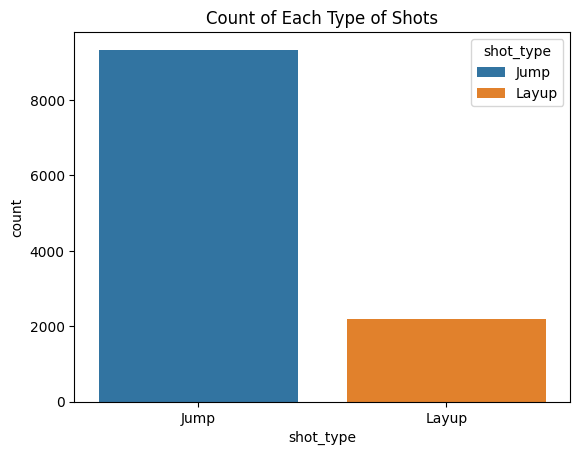

In [18]:
# create a count plot to show each type of shot
sns.countplot(shots, x='shot_type', hue='shot_type').set(title='Count of Each Type of Shots')

#### Interpretation for Countplot
The countplot displays a much higher count number of **Jump** shot (over 8000) over **Layup** shot (around 2000).

### Basketball Court
This function creates half of a basketball court using the `from matplotlib.patches import Circle, Rectangle, Arc`.
The function takes in `ax` as for axes, `color` by default is black, `lw` by defaul is 2 and `outer_lines=False`  as it parameters.<br>
When called, this function creates and return half of a basketbal court. 

In [19]:
# SOURCE: http://savvastjortjoglou.com/nba-shot-sharts.html
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

### Displot Subplots of Curry's shots
- Creating subplot:
    - `sns.displot()` creates a distribution plot from the **Seaborn** library.
    - `shot.query()` filters the `shots` to include only rows where `shot_type` is either `Jump` or `Layup` and use that as the data to create the displots.
    - `kind='kde'` specifies that we want a Kernel Density Estimate plot.
    - `x='loc_x', y='loc_y'` specifies the x and y axes of the plot.
    - `hue` colors the shots based on `shot_type`.
    - `height=5, aspect=1.5` controls the size and aspect ratio of the plot.
    - `col` makes separate subplots for each `shot_type`.
- Adding a basketball court to each subplot:
    - Looping through each subplot in the figure, assigning it to the variable `ax` in each iteration.
    - `g.axes` refers to the axes object returned by the `sns.displot` function. It contains information about the subplots created.
    - `.flat` flattens the axes object, meaning it returns an iterator that yields each individual subplot axis.
    - `draw_court` displays a basketball court by calling this function.
    - `set_xlim` and `set_ylim` sets the limits of the x and y axes for the basketball court.
    - `set_xlabel` and `set_ylabel` sets the labels for the x and y axes. 

In [20]:
# create a KDE plot that plots the distribution of the shots for each shot type
# Filter for 'Jump' and 'Layup' shots
# and displays them on the court

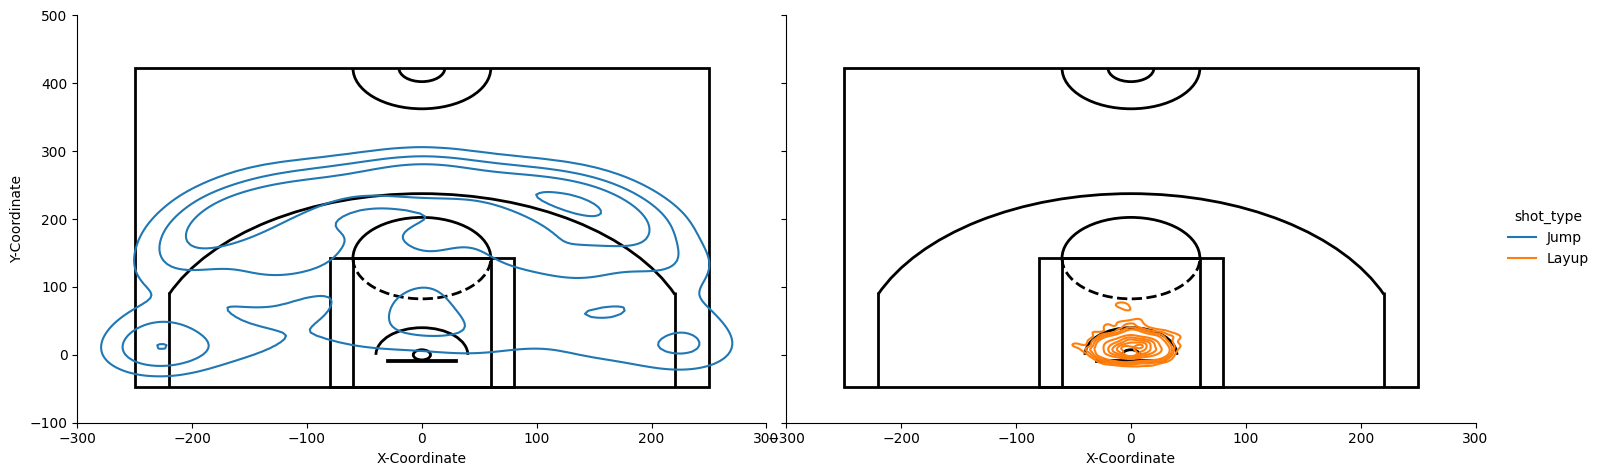

In [21]:
# Create subplots using Seaborn's `displot`
g = sns.displot(data=shots.query('shot_type in ["Jump", "Layup"]'), 
                kind='kde', 
                x='loc_x', y='loc_y', 
                hue='shot_type', 
                col='shot_type', # Separate subplots for "Jump" and "Layup" shot types
                height=5, 
                aspect=1.5).set(title='')

# Add basketball court to each subplot
for ax in g.axes.flat:
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-300, 300)
    ax.set_ylim(-100, 500)
    ax.set_xlabel('X-Coordinate')
    ax.set_ylabel('Y-Coordinate')


#### Interpretation on Curry's Jump and Layup Shots.
##### Jump Shots (Left Plot)
- The contour lines spread broadly around the perimeter, particularly around the three-point line, the corners and the mid-range area.
- Higher density areas (tighter contour lines) suggest that most jump shots occur outside the three-point line, with significant attempts near the free-throw line and around the arc.
- This distribution is typical of jump shots, which are often taken at various distances from the hoop.
##### Layup Shots (Right Plot)
- The density is concentrated very close to the basket, shown by the tight contour lines directly under the hoop and in the restricted zone.
- This reflects the typical nature of layups, which are generally taken within close range to the basket.

### Others
Plots I want to explore

#### More Common Substrings
Reusing the code in the **Picking Common Substring** section to get the common substring by adding and removing substrings. Apply the `get_label1()` to check and return substrings to new variables `a`, `b`, and `c`<br>

Simple countplots for common substrings.
- countplot 1: using `a` contains 'Jump', 'Layup', 'Running', 'Bank', 'Turnaround Fadeaway', 'Slam', 'Hook', 'Tip', and 'Dunk'.
- countplot 2: using `b` contains 'Running', 'Bank', 'Turnaround Fadeaway', 'Slam', 'Hook', 'Tip', and 'Dunk'.
- countplot 3: using `c` contains 'Bank', 'Turnaround Fadeaway', 'Slam', 'Hook', 'Tip', and 'Dunk'.

In [205]:
commonSubstrings1 = [
                     # 'Jump', # comment out substring i want to exclude from the countplot
                     # 'Layup',
                     # 'Running', 
                     'Bank',
                     'Turnaround Fadeaway',
                     'Slam',
                     'Hook',
                     'Tip',
                     'Dunk' 
                    ] 
actions1 = shots[shots.action_type.str.contains('|'.join(commonSubstrings1))].action_type.to_list() 
shots.query('action_type not in @actions1').action_type

Series([], Name: action_type, dtype: object)

In [206]:
def get_label1(row): # It takes a row as input and loops through the common substrings list.
    for substring1 in commonSubstrings1: #In the loop, check if the substring is in the row’s action_type column
        if substring1 in row['action_type']: # If so, return the substring.
            return substring1

In [207]:
a = shots.apply(get_label1, axis=1) # replacing shot_type with new values
a.unique()

array(['Jump', 'Layup', 'Running', 'Bank', 'Tip', 'Hook', 'Slam',
       'Turnaround Fadeaway', 'Dunk'], dtype=object)

<Axes: xlabel='count'>

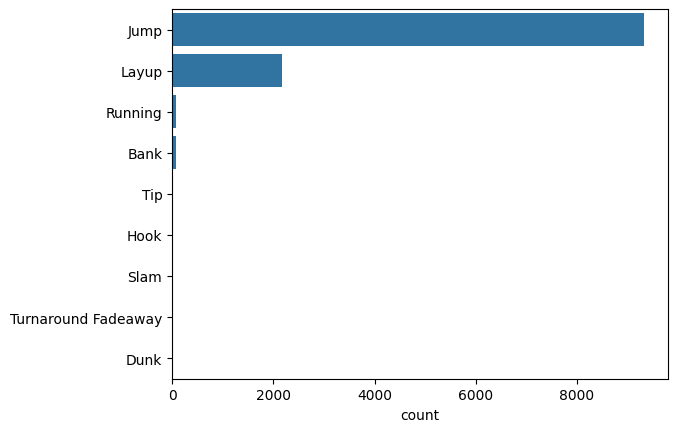

In [208]:
sns.countplot(a)

##### Interpretation countplot 1
The count number of the last 5 common substrings are too small to show comparing to the **Jump** over 8000 and **Layup** over 2000. 

In [172]:
b = shots.apply(get_label1, axis=1) # replacing shot_type with new values
a.unique()

array([None, 'Bank', 'Running', 'Hook', 'Tip', 'Slam',
       'Turnaround Fadeaway', 'Dunk'], dtype=object)

<Axes: xlabel='count'>

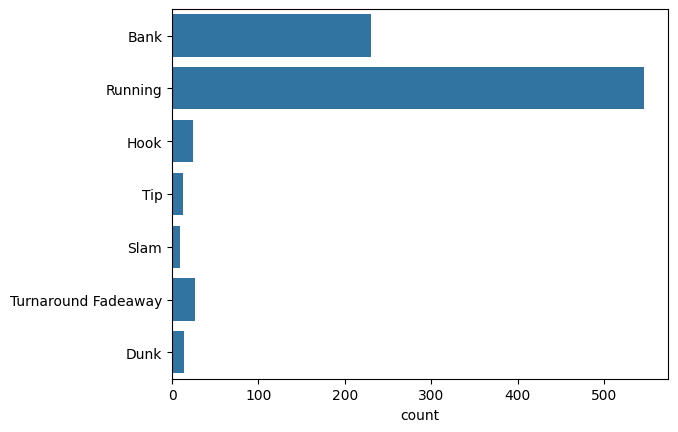

In [173]:
sns.countplot(b)

##### Interpretation countplot 2
After removing the **Jump** and **Layup** substrings, the other sevens substrings are displayed better with **Running** has the highest count value over 500.

In [198]:
c = shots.apply(get_label1, axis=1) # replacing shot_type with new values
c.unique()

array([None, 'Bank', 'Hook', 'Tip', 'Slam', 'Turnaround Fadeaway', 'Dunk'],
      dtype=object)

<Axes: xlabel='count'>

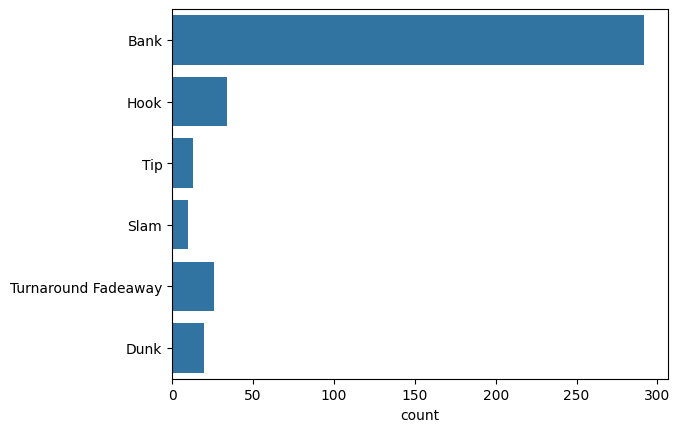

In [200]:
sns.countplot(c)

##### Interpretation countplot 3
After removing the **Jump**, **Layup** and **Running** substrings, the other six substrings are displayed better with **Bank** has the highest count value almost 300.

#### Combine Displot
Displaying Curry's **Jump** and **Layup** shots in a displot.

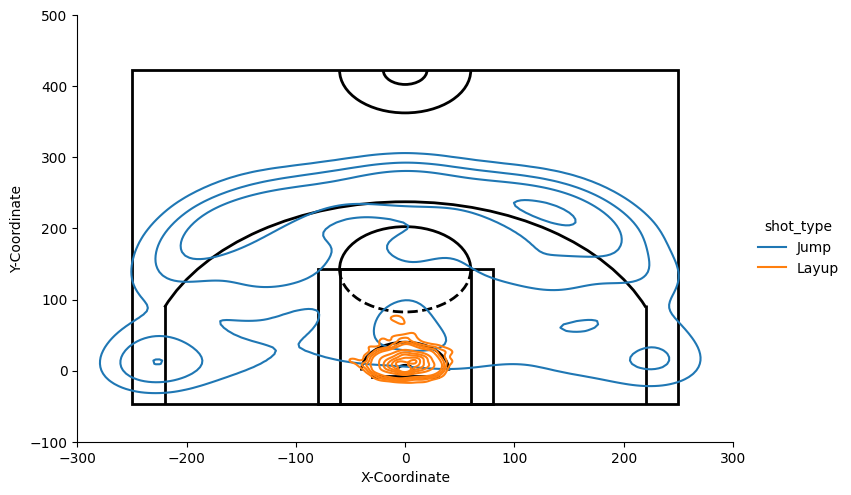

In [22]:
# Combine 'Jump' and 'Layup' into a single displot
g = sns.displot(data=shots.query('shot_type in ["Jump", "Layup"]'), kind='kde', 
                x='loc_x', y='loc_y', hue='shot_type',
                height=5, aspect=1.5) # no need to use col in the parameter

# Add basketball court to the plot
for ax in g.axes.flat:
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-300, 300)
    ax.set_ylim(-100, 500)
    ax.set_xlabel('X-Coordinate')
    ax.set_ylabel('Y-Coordinate')


#### Displot of Jump Shots

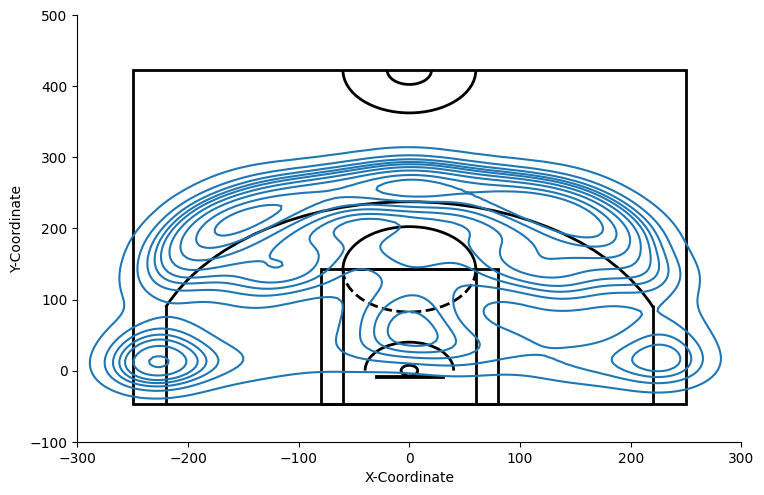

In [26]:
# Create subplots using Seaborn's `displot`
g = sns.displot(data=shots.query('shot_type in "Jump"'), kind='kde', 
                x='loc_x', y='loc_y',
                height=5, aspect=1.5)

# Add basketball court to each subplot
for ax in g.axes.flat:
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-300,300)
    ax.set_ylim(-100,500)
    ax.set_xlabel('X-Coordinate')
    ax.set_ylabel('Y-Coordinate')


##### Interpretation for Displot of Curry's Jump Shots
The density of the jump shot is more clearer and more contour lines.  

#### Displot of Layup Shots

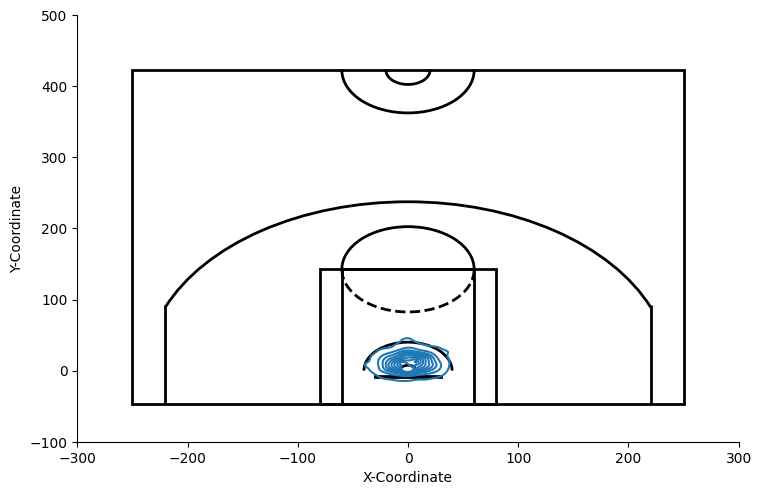

In [27]:
g = sns.displot(data=shots.query('shot_type in "Layup"'), kind='kde', 
                x='loc_x', y='loc_y', height=5, aspect=1.5)

# Add basketball court to each subplot
for ax in g.axes.flat:
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-300,300)
    ax.set_ylim(-100,500)
    ax.set_xlabel('X-Coordinate')
    ax.set_ylabel('Y-Coordinate')



#### Zooming in Dipslot of Curry's Layup Shots
Adjusting the `set_xlim` and `set_ylim` to zoom in and get a better look at Curry's layup shots.

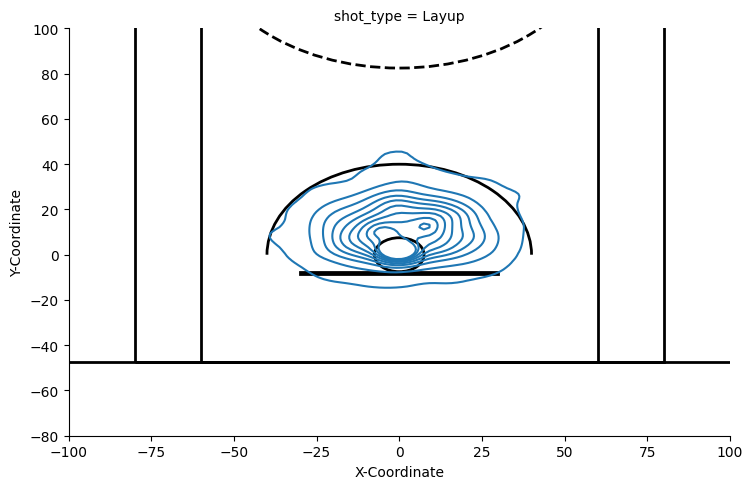

In [28]:
g = sns.displot(data=shots.query('shot_type in "Layup"'), kind='kde', 
                x='loc_x', y='loc_y', col='shot_type',
                height=5, aspect=1.5)

# Add basketball court to each subplot
for ax in g.axes.flat:
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-100,100) # Adjusted
    ax.set_ylim(-80,100) # Adjusted
    ax.set_xlabel('X-Coordinate')
    ax.set_ylabel('Y-Coordinate')

##### Interpretation for Displot of Curry's Layup Shots
There is different between this plot and the **Layup** distribution subplot from above. Here, it only displays Curry's layup shots are happend in the restricted zone and the net/hoop. Whereas the other plot displays the shot outside the restricted area. Therefore, more analysis are needed. 

## Conclusion
This analysis reveals a significant preference for jump shots over layups in Stephen Curry's shot distribution. His jump shots are primarily concentrated around the three-point line, showcasing his elite shooting ability from distance. In contrast, layups are tightly clustered near the basket, reflecting their close-range nature. Understanding these patterns can inform strategies for both Curry and his opponents.